# Homework 1

### 1
- *Read the datafile from Table 3 of Gao (2018)*

- *How many stars are included in this data?*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Add other imports here

In [2]:
file = 'Gao2018_GaiaEDR3.csv'
gao2018 = pd.read_csv(file)
gao2018['phot_g_mean_mag']

0       12.614237
1       12.631922
2       15.915327
3       14.222943
4       12.430536
          ...    
1497    14.469284
1498    15.309909
1499    16.613552
1500    16.161057
1501    18.175215
Name: phot_g_mean_mag, Length: 1502, dtype: float64

This data contains 1502 stars. The stars are described by 67 features. The number of stars and the features that describe them make up the data. 

### 2
- *Read the MIST Isochrone*

In [3]:
file2 = 'MIST_iso_61ca3125bac7d.iso.cmd'
mist = pd.read_csv(file2, header = 12, delim_whitespace = True)
mist.head

<bound method NDFrame.head of        EEP  log10_isochrone_age_yr  initial_mass  star_mass  log_Teff  \
0      226                    9.65      0.113136   0.113135  3.469524   
1      227                    9.65      0.117447   0.117447  3.472544   
2      228                    9.65      0.121829   0.121829  3.475614   
3      229                    9.65      0.126400   0.126399  3.478817   
4      230                    9.65      0.130769   0.130768  3.481880   
...    ...                     ...           ...        ...       ...   
1480  1706                    9.65      1.317225   0.555160  4.366943   
1481  1707                    9.65      1.317408   0.555153  4.358641   
1482  1708                    9.65      1.317615   0.555146  4.350286   
1483  1709                    9.65      1.317849   0.555137  4.341868   
1484  1710                    9.65      1.318113   0.555128  4.333381   

         log_g     log_L  [Fe/H]_init    [Fe/H]  Bessell_U  ...  \
0     5.204566 -2.887418  

### 4
- *Plot the Gaia EDR3 color-magnitude diagram for M67 using both the data from (1) and the model from (2). Use the BP-RP color (x-axis) and the apparent G-band magnitude (y-axis). Estimate the distance modulus to put the isochrone on top of the cluster data, or use information from the Gao (2018) crossmatch (e.g. Gaia parallax...)*

- *Label the M67 CMD with all major phases of stellar evolution:*
    - *Main Sequence*
    - *Turn Off*
    - *Blue Stragglers*
    - *Sub-Giants*
    - *Red giant branch*
    - *Horizontal Branch*
    - *White Dwarfs*

To estimate the distance modulus, we take the distance to M67 to be 800 pc. As a result, the absolute magnitude can be calculated using 
$$
M_{G} = -5\log_{10}(800)+5+m_{G}
$$
with $m_{G}$ the apparent magnitude and $M_{G}$ the absolute magnitude generated by the model

In [4]:
gao2018.columns

Index(['angDist', '_RAJ2000', '_DEJ2000', 'E', 'GaiaDR2', 'RAJ2000', 'DEJ2000',
       'PRF', 'Simbad', 'ra_epoch2000', 'dec_epoch2000', 'errHalfMaj',
       'errHalfMin', 'errPosAng', 'source_id', 'ra', 'ra_error', 'dec',
       'dec_error', 'parallax', 'parallax_error', 'parallax_over_error', 'pm',
       'pmra', 'pmra_error', 'pmdec', 'pmdec_error',
       'astrometric_n_good_obs_al', 'astrometric_gof_al',
       'astrometric_chi2_al', 'astrometric_excess_noise',
       'astrometric_excess_noise_sig', 'astrometric_params_solved',
       'pseudocolour', 'pseudocolour_error', 'visibility_periods_used', 'ruwe',
       'duplicated_source', 'phot_g_mean_flux', 'phot_g_mean_flux_error',
       'phot_g_mean_mag', 'phot_bp_mean_flux', 'phot_bp_mean_flux_error',
       'phot_bp_mean_mag', 'phot_rp_mean_flux', 'phot_rp_mean_mag',
       'phot_bp_rp_excess_factor', 'bp_rp', 'dr2_radial_velocity',
       'dr2_radial_velocity_error', 'dr2_rv_nb_transits',
       'dr2_rv_template_teff', 'dr2_rv_t

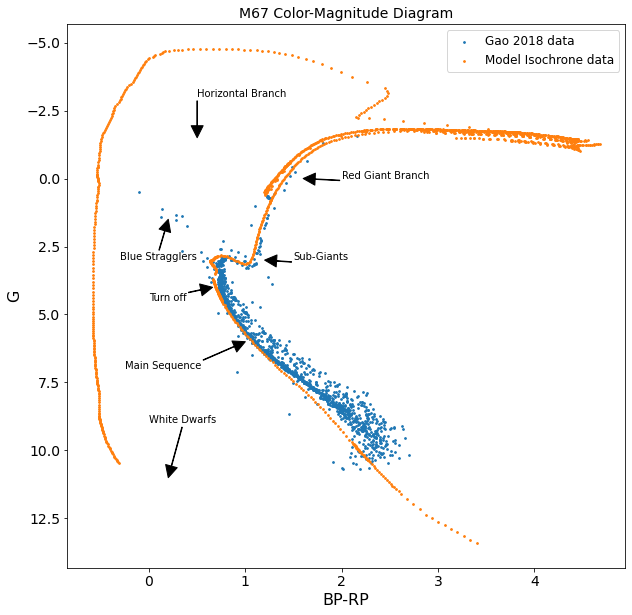

In [5]:
fig, ax = plt.subplots(1,1, figsize = (10, 10))
plt.tick_params(labelsize = 14)

distance_modulus = -5*np.log10(800)+5

gao2018_color = gao2018['bp_rp']
gao2018_mag = gao2018['phot_g_mean_mag']
ax.scatter(gao2018_color, 
           distance_modulus + gao2018_mag, 
           s = 3, 
           label = 'Gao 2018 data')

mist_color = mist['Gaia_BP_EDR3'] - mist['Gaia_RP_EDR3']
mist_mag =  mist['Gaia_G_EDR3']

ax.scatter(mist_color, 
           mist_mag, 
           s= 3, 
           label = 'Model Isochrone data')

ax.annotate('Main Sequence', xy=(1, 6), xytext=(-0.25, 7),
            arrowprops=dict(facecolor='black', width = 0.5, shrink=99))

ax.annotate('Turn off', xy=(0.66, 4), xytext=(0, 4.5),
            arrowprops=dict(facecolor='black', width = 0.5, shrink=99))

ax.annotate('Blue Stragglers', xy=(0.2, 1.5), xytext=(-0.3, 3),
            arrowprops=dict(facecolor='black', width = 0.5, shrink=99))

ax.annotate('Sub-Giants', xy=(1.2, 3), xytext=(1.5, 3),
            arrowprops=dict(facecolor='black', width = 0.5, shrink=99))

ax.annotate('Red Giant Branch', xy=(1.6, 0), xytext=(2, 0),
            arrowprops=dict(facecolor='black', width = 0.5, shrink=99))

ax.annotate('Horizontal Branch', xy=(0.5, -1.5), xytext=(0.5, -3),
            arrowprops=dict(facecolor='black', width = 0.5, shrink=99))

ax.annotate('White Dwarfs', xy=(0.2, 11), xytext=(0, 9),
            arrowprops=dict(facecolor='black', width = 0.5, shrink=99))

ax.invert_yaxis()
ax.set_xlabel('BP-RP', fontsize = 16)
ax.set_ylabel('G', fontsize = 16)
ax.set_title('M67 Color-Magnitude Diagram', fontsize = 14)
ax.legend(fontsize = 12)


plt.show()

### 4
- *Explain how you would answer these basic questions about M67, given such measurements and isochrone models:*
    - *How old is the cluster?*
    - *How far away is it?*
    - *How massive is it?*
- *Estimate each of these quantities as well*  

The age of a cluster can by matching an isochrone to the turnoff point of a cluster. By matching isochrones of different ages and whose metallicities mathch that of the cluster being studied, the age of the cluster can be determined for the cluster. The isochrone that best matches the turnoff point of the cluster corresponds to the age of the cluster. The isochrone in this assignemnt was generated with $age = log_{10}{9.65}$
Since this isochrone roughly corresponds to the age and metallicity of M67, we take the age of M67 to be $10^{9.65}$ or around 4.4 billion years old.


One can use the isochrone to estimate the distance. The distance modulus is definded as 
$$
m_G - M_G = 5\log_{10}{d}-5
$$
The isochrone is given in absolute magnitude. To estimate the distance to the cluster, we rearrange the equation
$$
M_G = -5\log_{10}{d}+5+m_G
$$
and try different values for the term containing $d$. The value that gives that best match between the Gao 2018 sample and the isochrone is the values used to solve for d. When this method is applied usign the model isochrone and the GAO 2018 data, the distance to the cluster is ~800 pc


In [14]:
centers = np.arange(-2, 11, 0.4)
cluster_mass = 0
stars = 0

mist['bp_rp'] = mist['Gaia_BP_EDR3'] - mist['Gaia_RP_EDR3']
mist_color_slice = mist[np.abs(1.5 - mist['bp_rp']) < 1.5]

gao2018['abs_mag'] = gao2018['phot_g_mean_mag'] + distance_modulus

for i in centers: 
    mist_mass_slice = mist_color_slice[np.abs(
        i - mist_color_slice['Gaia_G_EDR3']) 
                                   < 0.2]
    mean = mist_mass_slice['star_mass'].mean()
    
    data_mag_slice = gao2018[np.abs(i - gao2018['abs_mag']) < 0.2]
    mass_of_slice = mean * data_mag_slice.shape[0]
    cluster_mass = cluster_mass + mass_of_slice
    stars = stars + data_mag_slice.shape[0]

print(cluster_mass, stars)

1193.9741555683527 1502


The mass of stars changes as they evolve. An approximation of the mass of the cluster can be obtained by averaging the mass' given in the model isochrone data for some interval in absolute magnitude and multiplying that average by all of the stars that fall within that interval from the Gao 2018 data. Performing this style of approximation gives a cluster mass of 1193 solar masses. 

### 5
- *Above the main sequence is a smaller, parallel track of stars. What is it? How far above the main sequence is it? Why?*

This parallel track of stars are binary stars. They sit about 1 magnitude above the main sequence stars. One expects that a binary star system, with two equal mass stars, would be twice as bright as a single star with the same mass as the constituent stars. We wish to calculate the difference in the magnitudes $M_{single} - M_{binary}$ where the relationship between the luminosity of a star and it's absolute magnitude is given by
$$
M = M_{sun} - 2.5\log_{10}{\frac{L}{L_0}}
$$

assuming that the luminosity of the binary star is 2 times the luminosity of the single star $ L_{binary} = 2L_{single} = 2L$ then we write

$$
M_{single} - M_{binary} = M_{sun} - 2.5\log_{10}{\frac{L}{L_0}} - M_{sun} + 2.5\log_{10}{\frac{2L}{L_0}}
$$ 
Simplifying 
$$
M_{single} - M_{binary} = 2.5(log_{10}{2L} - log_{10}{L_0} - log_{10}{L} + log_{10}{L_0}) = 2.5(log_{10}{\frac{2L}{L}}) = 0.75
$$

Which agrees with the the difference in magnitude of the two parrallel tracks of stars in the Gao 2018 sample.

In [15]:
2.5*np.log10(2)

0.752574989159953